# Machine Learning Project : Predicting Loan Defaults for P2P lending

In [24]:
# Import Library Necessary for this Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import display # this will allow us to perform display() for Dataframe

# Better Display for Notebooks 
%matplotlib inline
plt.style.use('ggplot')

#Loading the Loan Dataset. This will end up being our Training Dataset
df_2012_2013 = pd.read_csv('2012-2013.csv',skiprows= 1, low_memory= False)
df_2014 = pd.read_csv('2014.csv', skiprows= 1, low_memory= False)
df_2015 = pd.read_csv('2015.csv', skiprows= 1, low_memory= False)
# Appending the two datasets together to prepare our traning dataset

data_train = pd.concat([df_2012_2013, df_2014, df_2015], axis= 0)
print data_train.shape[0]

844905



There are 7 loan statuses : Charged Off, Current, Default, Fully Paid, In Grace Period, Late (16-30 days), Late (31-120 days). We will consider Late (31 -120 days) , Default , Charged Off as a Default loan and Fully-Paid as a desirable loan and ignore everything else.

Statuses before : 
['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Default']


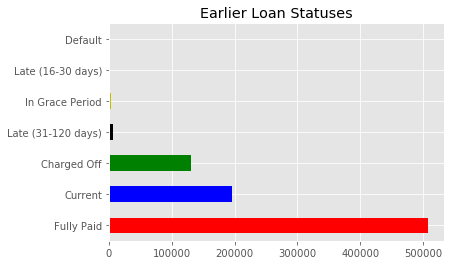

Statuses after : 
['Fully Paid', 'Default']


In [25]:
print "Statuses before : " 
print data_train['loan_status'].unique().tolist()
data_train['loan_status'].value_counts().plot(kind = 'barh', color = 'rbgkymc', title = 'Earlier Loan Statuses')
plt.show()
data_train = data_train.loc[(data_train['loan_status'].isin(['Fully Paid','Charged Off','Late (31-120 days)','Default']))]
data_train['loan_status'] = data_train['loan_status'].apply(lambda x: "Default" if
                                                            x in ['Late (31-120 days)','Charged Off','Default'] else x)

print "Statuses after : " 
print data_train['loan_status'].unique().tolist()

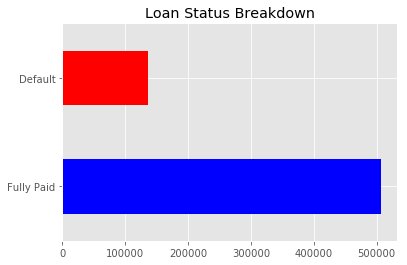

In [26]:
data_train['loan_status'].value_counts().plot(kind = 'barh', color = 'br', title = 'Loan Status Breakdown')
plt.show()

The Data Dictionary provided by the LendingClub does a great job in explaining what every feature means. After some research, I was able to filter our Independent Variables that would not add value to our model. We will being with removing columns with more than 50% missing values. 


In [27]:
data_len = len(data_train)/2 
loan_data = data_train.dropna(thresh= data_len, axis = 1)
loan_data.to_csv('Loan_data.csv', index = False)

In [29]:
loan_data = pd.read_csv('Loan_data.csv', low_memory= False)
loan_data.drop_duplicates()
loan_data.iloc[0]

loan_amnt                                                    14000
funded_amnt                                                  14000
funded_amnt_inv                                              14000
term                                                     36 months
int_rate                                                    12.85%
installment                                                 470.71
grade                                                            B
sub_grade                                                       B4
emp_title                     Assistant Director - Human Resources
emp_length                                                 4 years
home_ownership                                                RENT
annual_inc                                                   88000
verification_status                                   Not Verified
issue_d                                                     Dec-13
loan_status                                             Fully 

As we can see we have a lot of columns to deal with in this dataset. We will now explore the data dictionary as this will be useful to clean the data. This part is crucial in order to understand the data and avoid error while fitting our machine learning model later on.

In [39]:
# Let us see how many columns we have
print loan_data.shape[1]
loan_data_columns = loan_data.columns


87


We will see if we have description for all the 87 columns that we have. We will get rid of the columns for which we dont. 

In [58]:
data_dict = pd.read_excel('LCDataDictionary.xlsx')
data_dict_col = data_dict['LoanStatNew'].tolist()
print set(loan_data_columns) - set(data_dict_col)
difference = list(set(loan_data_columns).intersection(set(data_dict_col)))
loan_data  = loan_data[difference]
data_dict['Flag'] = data_dict.apply(lambda x: "Yes" if x['LoanStatNew'] in loan_data_columns else "No", axis = 1)
data_dict = data_dict[data_dict['Flag'] == "Yes"][['LoanStatNew','Description']]


set(['debt_settlement_flag', 'disbursement_method', 'hardship_flag', 'total_rev_hi_lim'])


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
4,annual_inc,The self-reported annual income provided by th...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
11,collection_recovery_fee,post charge off collection fee
